In [1]:
#Below we can solve the Kelperian Two-Body Problem


import numpy as np
import matplotlib.pyplot as plt

Step 1000: r1=[110613.20395279  26861.27564749], r2=[1.12759802e+11 9.82617379e+10], v1_half=[0.05874863 0.02198197], v2_half=[-19566.48095409  22458.81287912]
Step 2000: r1=[387869.71519652 198957.24471746], r2=[2.04183417e+10 1.48152443e+11], v1_half=[0.08860111 0.07717194], v2_half=[-29508.97632986   4077.55714495]
Step 3000: r1=[695310.10187823 590068.90011069], r2=[-8.19759867e+10  1.25099043e+11], v1_half=[0.07483386 0.13838977], v2_half=[-24923.73612065 -16311.30251993]
Step 4000: r1=[ 881602.24674318 1166078.92914852], r2=[-1.44021378e+11  4.04644531e+10], v1_half=[0.02424662 0.17547994], v2_half=[ -8075.43954418 -28664.33933383]
Step 5000: r1=[ 855168.955652   1801874.66083187], r2=[-1.35217658e+11 -6.40820195e+10], v1_half=[-0.03823059  0.17022055], v2_half=[ 12732.85916235 -26912.67770437]
Step 6000: r1=[ 629137.88175826 2343093.76289944], r2=[-5.99370474e+10 -1.37129343e+11], v1_half=[-0.08188197  0.12524866], v2_half=[ 27271.1375628  -11934.59975826]
Step 7000: r1=[ 314667

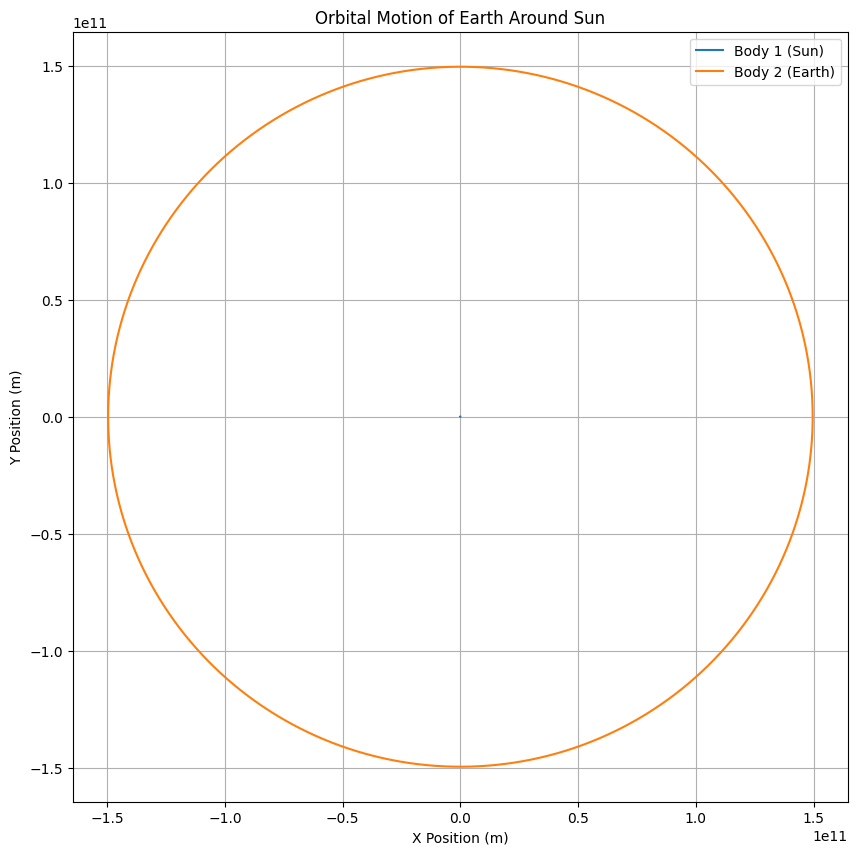

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#===System Parameters===
G = 6.67e-11
m1 = 1.989e30  # Mass of the sun
m2 = 5.972e24  # Mass of the earth
dt = 60 * 60  # 1 hour time step in seconds
t_max = 365 * 24 * 60 * 60  # 1 year in seconds

#===Time array===
t = np.arange(0, t_max, dt)

#===Position and Velocity Arrays===
r1 = np.zeros((len(t), 2))
r2 = np.zeros((len(t), 2))
v1_half = np.zeros((len(t), 2))
v2_half = np.zeros((len(t), 2))

#===Initial Conditions===
r1[0] = [0.0, 0.0]  # Body 1 at origin (sun)
r2[0] = [1.496e11, 0.0]  # Body 2 initial position (earth, 1 AU from sun)
v1_half[0] = [0.0, 0.0]  # Body 1 initial velocity
v2_half[0] = [0.0, 29780.0]  # Body 2 initial velocity (earth's orbital speed)

#===Leapfrog Integration===
for i in range(1, len(t)):
    r12 = r2[i-1] - r1[i-1]
    dist = np.linalg.norm(r12)

    # Gravitational Force
    force = G * m1 * m2 / dist**3 * r12

    # Update velocities (half-step)
    v1_half[i] = v1_half[i-1] + dt * force / m1
    v2_half[i] = v2_half[i-1] - dt * force / m2

    # Update positions (full-step)
    r1[i] = r1[i-1] + dt * v1_half[i]
    r2[i] = r2[i-1] + dt * v2_half[i]

    # Print statements for debugging
    if i % 1000 == 0:
        print(f"Step {i}: r1={r1[i]}, r2={r2[i]}, v1_half={v1_half[i]}, v2_half={v2_half[i]}")

# Calculate full-step velocities
v1 = np.zeros((len(t), 2))
v2 = np.zeros((len(t), 2))
v1[0] = [0.0, 0.0]
v2[0] = [0.0, 29780.0]
for i in range(1, len(t)):
    # Calculate the distance between the two bodies
    r12 = r2[i] - r1[i]
    distance = np.linalg.norm(r12)

    # Calculate the gravitational force
    force = G * m1 * m2 / distance**3 * r12

    # Update velocities (full-step)
    v1[i] = v1_half[i] + 0.5 * dt * force / m1
    v2[i] = v2_half[i] - 0.5 * dt * force / m2

# Plotting the results
plt.figure(figsize=(10, 10))
plt.plot(r1[:, 0], r1[:, 1], label='Body 1 (Sun)')
plt.plot(r2[:, 0], r2[:, 1], label='Body 2 (Earth)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.title('Orbital Motion of Earth Around Sun')
plt.grid(True)
plt.show()






